# Analyzing borrowers’ risk of defaulting

Our project is to prepare a report for a bank’s loan division. We’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Our report will be considered when building **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.


# 1.Goal:
Test five hypotheses:

- Is there a correlation between having children and paying back on time?
- Is there a correlation between family status and paying back on time?
- Is there a correlation between income level and paying back on time?

## Open the data file and have a look at the general information. 

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('https://code.s3.yandex.net/datasets/credit_scoring_eng.csv')
df


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan



In [2]:
# Let's see how many rows and columns our dataset has
df.shape

(21525, 12)

In [3]:
# Let's print the first N row
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family



- The table contains 12 columns and have differant type of data: float, integer,object.

- We can see some issue with values in columns:
1. Column 'education' have different registers: some letter uppercase and some lowercase
2. Column 'days_employed' have incorect artifacts
3. Column 'total_income' have blank cells

In [4]:
# Get info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB



- Dataset has 21525 rows and data types int64, float64, and object.
- The columns 'days_employed' and 'total_income' have 19351 rows.As we see the number of row is different. This means the data contains missing values.

In [5]:
#View the statistical details
df.describe()


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [6]:
df.describe(include=object)

,education,family_status,gender,income_type,purpose
count,21525,21525,21525,21525,21525
unique,15,5,3,8,38
top,secondary education,married,F,employee,wedding ceremony
freq,13750,12380,14236,11119,797


In [7]:
# Let's look at the filtered table with missing values in the the first column with missing data
display(df['days_employed'].value_counts(dropna=False))

 NaN            2174
-1645.463049       1
-6620.396473       1
-1238.560080       1
-3047.519891       1
                ... 
-2849.351119       1
-5619.328204       1
-448.829898        1
-1687.038672       1
-206.107342        1
Name: days_employed, Length: 19352, dtype: int64



- The missing values in 'days_employed' is repesented as NaN 
- 'days_employed' column has 2174 missing values 
- The size of missing value columns 'days_employed' and 'total_income' have same number of row 2174


In [8]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.

#df.loc[(df['days_employed'].isna()) & (df['total_income'].isna())]
df.groupby(['days_employed','total_income']).size().reset_index(name='count')

,days_employed,total_income,count
0,-18388.949901,29788.629,1
1,-17615.563266,19609.719,1
2,-16593.472817,19951.655,1
3,-16264.699501,8198.235,1
4,-16119.687737,14644.430,1
...,...,...,...
19346,401663.850046,7725.831,1
19347,401674.466633,52063.316,1
19348,401675.093434,20194.323,1
19349,401715.811749,9182.441,1


 - Missing value muched with missing value to other dataset. that means it might be have corralation

In [9]:
# Let's investigate clients who do not on identified characteristic have data  and the column with the missing values
#df.count()
df[df['days_employed'].notna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [10]:
# Checking distribution
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [11]:
#Calculate the percentage of the missing values compared to the whole dataset.
df.isna().mean().round(4)*100

children             0.0
days_employed       10.1
dob_years            0.0
education            0.0
education_id         0.0
family_status        0.0
family_status_id     0.0
gender               0.0
income_type          0.0
debt                 0.0
total_income        10.1
purpose              0.0
dtype: float64

In [12]:
#Percentage of missing values

missing_values=df.isnull().sum()
missing_values[missing_values>0]/len(df)*100

days_employed    10.099884
total_income     10.099884
dtype: float64

- Dataset has 10% of missing values.In term of rule we can not use method drop value if 5-10% mising


**Possible reasons for missing values in data**
- According my hypotesis type of missing values is MAR.Missing at random (MAR) means that the chance of being missing does not depend on the unobserved value of the variable itself, but it can depend on other observed variables.
- Missing value related to other value .Variable 'total_income' and 'days_employed' have the same amount of missing data
- This is confusing and would be better stated as missing conditionally at random. Here, missing data do have a relationship with other variables in the dataset. However, the actual values that are missing are random.


In [13]:
# Checking the distribution in the whole dataset
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [14]:
# Check for other reasons and patterns that could lead to missing values

df.describe(include=object)

,education,family_status,gender,income_type,purpose
count,21525,21525,21525,21525,21525
unique,15,5,3,8,38
top,secondary education,married,F,employee,wedding ceremony
freq,13750,12380,14236,11119,797


###### My conclusions
- 1.Dataset has 10% of missing values.
- 2. According my hypotesis type of missing values is MAR.Missing at random (MAR) means that the chance of being missing does not depend on the unobserved value of the variable itself, but it can depend on other observed variables.
- Missing value related to other value .Variable 'total_income' and 'days_employed' have the same amount of missing data
- This is confusing and would be better stated as missing conditionally at random. Here, missing data do have a relationship with other variables in the dataset. However, the actual values that are missing are random.
- 3.Type of missing data is MAP

- 4.Data in columns 'days_employed' and 'total_income' are quantitative variables.
- 5.Missing values for such variables are filled in with representative values (mean or median if any outliers)


## Data transformation

Let's go through each column to see what issues we may have in them and Check the data in each columns



**Education column**

In [15]:
# Let's see all values in education column to check if and what spellings will need to be fixed
display(sorted(df['education'].unique()))

["BACHELOR'S DEGREE",
 "Bachelor's Degree",
 'GRADUATE DEGREE',
 'Graduate Degree',
 'PRIMARY EDUCATION',
 'Primary Education',
 'SECONDARY EDUCATION',
 'SOME COLLEGE',
 'Secondary Education',
 'Some College',
 "bachelor's degree",
 'graduate degree',
 'primary education',
 'secondary education',
 'some college']

- Column 'education' have different registers: some letter uppercase and some lowercase

In [16]:
# Fix the registers if required
df['education'] = df['education'].str.lower()

In [17]:
# Checking all the values in the column to make sure we fixed them
display(sorted(df['education'].unique()))

["bachelor's degree",
 'graduate degree',
 'primary education',
 'secondary education',
 'some college']

- have spelling problem with "bachelor's degree",

In [18]:
# Let's fix it
df['education'] = df['education'].replace("bachelor's degree",'bachelor degree')
display(sorted(df['education'].unique()))

['bachelor degree',
 'graduate degree',
 'primary education',
 'secondary education',
 'some college']

**Chldren column**


In [19]:
# Let's see the distribution of values in the `children` column
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [20]:
# Calculation of percantage of problematic data.
df.groupby(['children']).agg({'children': 'sum'})/len(df['children'])*100

,children
children,
-1,-0.218351
0,0.000000
1,22.383275
2,19.094077
3,4.599303
4,0.761905
5,0.209059
20,7.061556


- As we see dataset have problematic data like Inconsistent data  -1  and Irregular data  like 20 (outliers). 
- The number of children not be "negative" and some family have 20 children 
- We can not remove it becouse this is meanful variable for us
- Negative value we can replace with absolute values.
- Outliers 20 we can replace using the winsorization method: replace these values with a quantile, for example, the value 0.9. Method .quantile()

In [21]:
# fix the data based on replace with abcolute values
#df['children'] = df['children'].apply(lambda x: 0 if x < 0 else x)
df['children'] = np.abs(df['children'])

In [22]:
#Checking the `children` column again to make sure it's all fixed
df['children'].value_counts()

0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

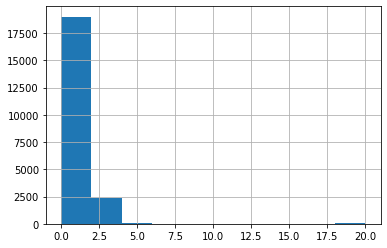

In [23]:
# Detected outliers by visualisation with histogram 
df['children'].hist()

In [24]:

q = df['children'].quantile(0.9)
print(q)


2.0


In [25]:
#replace these values with a replace these values with a quantile ()df['children'].quantile(0.9)
df['children'] = df['children'].replace({20: 2})


In [26]:
# Let's check
display(sorted(df['children'].unique()))

[0, 1, 2, 3, 4, 5]

In [27]:
 
df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

**Days_employed column**

In [28]:
# Find problematic data in `days_employed`, if they exist, and calculate the percentage
#df['days_employed'].value_counts() 
#df.groupby(['days_employed']).agg({'days_employed': 'sum'})/len(df['days_employed'])*100.
df.loc[df['days_employed']< 0]['days_employed'].count()/len(df['days_employed'])*100

73.89547038327527

- If the amount of problematic data is high, it could've been due to some technical issues. We may probably want to propose the most obvious reason why it could've happened and what the correct data might've been, as we can't drop these problematic rows

In [29]:
# Address the problematic values, if they exist 
df['days_employed'] = np.abs(df['days_employed'])

In [30]:
# Check the result - make sure it's fixed
df['days_employed'].value_counts()

986.927316     1
7026.359174    1
4236.274243    1
6620.396473    1
1238.560080    1
              ..
2849.351119    1
5619.328204    1
448.829898     1
1687.038672    1
582.538413     1
Name: days_employed, Length: 19351, dtype: int64

**Age column**

In [31]:
# Check the `dob_years` for suspicious values and count the percentage
df['dob_years'].value_counts() 
#df.groupby(['dob_years']).agg({'dob_years': 'sum'})/len(df['dob_years'])*100



35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [32]:
df.loc[df['dob_years'] == 0]['dob_years'].count()/len(df['dob_years'])*100

0.4692218350754936


 - We have 0 age value wich is removed

In [33]:
# Address the issues in the `dob_years` column, if they exist
# Remove all 0 values from column 'dob_years'
df =df[df['dob_years'] !=0]


In [34]:
# Check the result - make sure it's fixed
display(sorted(df['dob_years'].unique())) 


[19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75]

**family_status column**

In [35]:
# Let's see the values for the column
df['family_status'].value_counts()



married              12331
civil partnership     4156
unmarried             2797
divorced              1185
widow / widower        955
Name: family_status, dtype: int64

In [36]:
# Address the problematic values in `family_status`, if they exist
#df.loc[:,'famaly_status'] = df.loc[:,'family_status'].replace('widow / widower','widoved')
#df['family_status']= df['family_status'].str.strip().str.replace('widow / widower','widoved')


In [37]:
# Check the result - make sure it's fixed
df['family_status'].value_counts()

married              12331
civil partnership     4156
unmarried             2797
divorced              1185
widow / widower        955
Name: family_status, dtype: int64

**Gender Column**

In [38]:
# Let's see the values in the column
df['gender'].value_counts()

F      14164
M       7259
XNA        1
Name: gender, dtype: int64

In [39]:
# Address the problematic values, if they exist
#df['gender'] = df['gender'].replace('XNA','X')
#df =df[df['gender'] !='XNA']
df =df[df['gender'] !='XNA']


- under new national guidelines, individuals will be given the option of selecting M (male), F (female) or X (Indeterminate/Intersex/Unspecified) for personal records held by government departments and agencies from July 1.

In [40]:
df['gender'].value_counts()
# Check the result - make sure it's fixed



F    14164
M     7259
Name: gender, dtype: int64

#### income_type column 

In [41]:
# Let's see the values in the column
df['income_type'].value_counts()



employee                       11064
business                        5064
retiree                         3836
civil servant                   1453
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

Now let's see if we have any duplicates in our data.

In [42]:
# Checking duplicates
print(df.duplicated().sum()) 


71


In [43]:
# Address the duplicates, if they exist
df = df.drop_duplicates().reset_index(drop=True)

In [44]:
# Last check whether we have any duplicates
print(df.duplicated().sum()) 

0


In [45]:
# Check the size of the dataset that you now have after your first manipulations with it
df.shape

(21352, 12)

#### Conclusion
**In the  data transformation stage and the data-cleaning process:**
- Column 'education' have different registers: some letter uppercase and some lowercase..str.lower() to convert string   data to the same lowercase format.We used str.lower() to convert string data to the same lowercase format.

- Column 'children' have negotive value -1 and have been replaced by abcolute values and outliers 20 replaced by 2

- Column 'dob_yaers' have 0 age and 'gender' with problematic value were removed
- We removed dublicates


# Working with missing values

To speed up working with some data, we want to work with dictionaries for some values, where IDs are provided

In [46]:
# find dictionary
education_dict = df[['education_id', 'education','total_income']].drop_duplicates().reset_index(drop=True)
print(education_dict)

       education_id            education  total_income
0                 0      bachelor degree     40620.102
1                 1  secondary education     17932.802
2                 1  secondary education     23341.752
3                 1  secondary education     42820.568
4                 1  secondary education     25378.572
...             ...                  ...           ...
19257             1  secondary education     35966.698
19258             1  secondary education     24959.969
19259             1  secondary education     14347.610
19260             1  secondary education     39054.888
19261             1  secondary education     13127.587

[19262 rows x 3 columns]


In [47]:
age_dict = df[['dob_years','total_income']].drop_duplicates().reset_index(drop=True)
print(age_dict)

       dob_years  total_income
0             42     40620.102
1             36     17932.802
2             33     23341.752
3             32     42820.568
4             53     25378.572
...          ...           ...
19309         43     35966.698
19310         67     24959.969
19311         38     14347.610
19312         38     39054.888
19313         40     13127.587

[19314 rows x 2 columns]


In [48]:
marital_status_dict = df[['family_status_id', 'family_status','total_income']].drop_duplicates().reset_index(drop=True)
print(marital_status_dict)


       family_status_id      family_status  total_income
0                     0            married     40620.102
1                     0            married     17932.802
2                     0            married     23341.752
3                     0            married     42820.568
4                     1  civil partnership     25378.572
...                 ...                ...           ...
19259                 1  civil partnership     35966.698
19260                 0            married     24959.969
19261                 1  civil partnership     14347.610
19262                 0            married     39054.888
19263                 0            married     13127.587

[19264 rows x 3 columns]


In [49]:
df.pivot_table(index=['dob_years','income_type'],
               columns='education',
               values='total_income', 
               aggfunc='median')

education                bachelor degree  graduate degree  primary education  \
dob_years income_type                                                          
19        business                   NaN              NaN                NaN   
          civil servant              NaN              NaN                NaN   
          employee                   NaN              NaN                NaN   
20        business            16000.3725              NaN                NaN   
          civil servant       11376.8600              NaN                NaN   
...                                  ...              ...                ...   
73        retiree                    NaN              NaN           16026.66   
74        business                   NaN              NaN                NaN   
          employee                   NaN              NaN                NaN   
          retiree             21589.6570              NaN                NaN   
75        civil servant              NaN              NaN                NaN   

education                secondary education  some college  
dob_years income_type                                       
19        business                 16588.237    26598.4335  
          civil servant                  NaN    12125.9860  
          employee                 14934.901    13752.8305  
20        business                 23197.793    13850.4680  
          civil servant            39796.052           NaN  
...                                      ...           ...  
73        retiree                  19070.478           NaN  
74        business                 19972.813           NaN  
          employee                 15831.345           NaN  
          retiree                   7214.327           NaN  
75        civil servant            24525.224           NaN  

[213 rows x 5 columns]

### Restoring missing values in `total_income`




Let's Start with addressing total income missing values. Create and age category for clients. Create a new column with the age category. This strategy can help with calculating values for the total income.


In [50]:
# Let's write a function that calculates the age category
def age_group(dob_years):
    if 19 <= dob_years <= 35:
        return 'young'
    if 36 <= dob_years <= 65:
        return 'adults'
    else:
        return 'retired'  

In [51]:
# Test if the function works
print(age_group(35))
print(age_group(52))
print(age_group(66))

young
adults
retired


In [52]:
# Creating new column based on function

df['age_group'] = df['dob_years'].apply(age_group)

In [53]:
# count age_group 
df['age_group'].value_counts() 

adults     14068
young       6582
retired      702
Name: age_group, dtype: int64

In [54]:
# Checking how values in the new column
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42,bachelor degree,0,married,0,F,employee,0,40620.102,purchase of the house,adults
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adults
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,young
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,young
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adults


Create a table that only has data without missing values. This data will be used to restore the missing values.

In [55]:
# Create a table without missing values and print a few of its rows to make sure it looks fine
new_table = df[df['total_income'].notna()]
display(new_table.head(5))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42,bachelor degree,0,married,0,F,employee,0,40620.102,purchase of the house,adults
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adults
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,young
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,young
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adults


In [56]:
# Look at the mean values for income based on your identified factors
df.groupby(['age_group'])['total_income'].mean()


age_group
adults     27079.438987
retired    20804.461461
young      26835.133080
Name: total_income, dtype: float64

In [57]:
# Look at the median values for income based on your identified factors
df.groupby(['age_group'])['total_income'].median()


age_group
adults     23246.3940
retired    17978.2310
young      23522.1745
Name: total_income, dtype: float64

In [58]:
#  Write a function that we will use for filling in missing values
df["total_income"] = df.groupby("age_group").transform(lambda x: x.fillna(x.mean()))

In [59]:
# Check if it work
df['total_income'].isna().sum()

0

In [60]:
# Replacing missing values if there are any errors

df.groupby(['education'])['total_income'].median()

education
bachelor degree        0.0
graduate degree        0.0
primary education      0.0
secondary education    0.0
some college           0.0
Name: total_income, dtype: float64

In [61]:
# Checking the number of entries in the columns
df["total_income"] = df.groupby("education").transform(lambda x: x.fillna(x.mean()))

In [62]:
df.isna().sum()

children               0
days_employed       2093
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
age_group              0
dtype: int64

###  Restoring values in `days_employed`

In [63]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21352.000000,19259.000000,21352.000000,21352.000000,21352.000000,21352.000000,21352.000000
mean,0.480517,66905.789237,43.476817,0.817722,0.972649,0.081163,0.480517
std,0.755846,139025.028132,12.241877,0.548717,1.421020,0.273092,0.755846
min,0.000000,24.141633,19.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,926.823974,33.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,2197.320350,43.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,5540.399763,53.000000,1.000000,1.000000,0.000000,1.000000
max,5.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,5.000000


In [64]:
# Distribution of `days_employed` medians based on your identified parametedf['days_employed'].median
df['days_employed'].median()


2197.320349646864

In [65]:
# Distribution of `days_employed` means based on your identified parameters
df.groupby(['income_type'])['days_employed'].mean()

income_type
business                         2112.744402
civil servant                    3388.508552
employee                         2328.603723
entrepreneur                      520.848083
paternity / maternity leave      3296.759962
retiree                        365015.727554
student                           578.751554
unemployed                     366413.652744
Name: days_employed, dtype: float64

we going to use median for replace missing values becouse data is numerical and dataset have outliers 

In [66]:
#Let's write a function that calculates means or medians (depending on your decision) 
#based on your identified parameter
df["days_employed"] = df.groupby("income_type").transform(lambda x: x.fillna(x.mean()))


In [67]:
# Check that the function works
df['days_employed'].isna().sum()


0

In [68]:
# Replacing missing values
#df['days_employed'].fillna(df['days_employed'].median(),inplace = True
df["days_employed"] = df.groupby("income_type").transform(lambda x: x.fillna(x.mean()))


In [69]:
# Check the entries in all columns - make sure we fixed all missing values
df.isna().sum()


children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_group           0
dtype: int64

In [70]:
data = df.copy()

In [71]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_group           0
dtype: int64

In [72]:
data = data.apply(lambda x: x.fillna(x.median())
                  if x.dtype == 'float'
                  else x.fillna(x.value_counts().index[0]))

In [73]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_group           0
dtype: int64

## Categorization of data

To answer the questions and test the hypotheses, i will want to work with categorized data


In [74]:
#Let's check unique values

df['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [75]:
# Let's write a function to categorize the data based on common topics
def status_unpaid(row):
    family_status = row['family_status']
    debt = row['debt']
    
    if family_status == 'married':
        if debt == 1:
            return 'unpaid'
    if family_status == 'civil partnership':
        if debt == 1:
            return 'unpaid'
    if family_status == 'widow / widower':
        if debt == 1:
            return 'unpaid'
    if family_status == 'divorced':
        if debt == 1:
            return 'unpaid'
    if family_status == 'unmarried':
        if debt == 1:
            return 'unpaid'
    return 'paid'
row_values = ['unmarried', 1]
row_columns = ['family_status', 'debt'] # create a list containing the two columns relevant to the function
row =pd.Series(data=row_values, index=row_columns) # create the row
# pass the row to the function and print the output

print(status_unpaid(row))



unpaid


In [76]:
# Create a column with the categories and count the values for them

df['status_unpaid'] = df.apply(status_unpaid, axis=1) 

In [77]:
# Looking through all the numerical data in your selected column for categorization
print(df['status_unpaid'].value_counts())


paid      19619
unpaid     1733
Name: status_unpaid, dtype: int64


In [78]:
# Getting summury statistics for the column
#df.groupby(['family_status','status_unpaid'])['debt'].count()

df.groupby(['family_status','status_unpaid'],as_index = False)['debt'].sum()


,family_status,status_unpaid,debt
0,civil partnership,paid,0
1,civil partnership,unpaid,386
2,divorced,paid,0
3,divorced,unpaid,85
4,married,paid,0
5,married,unpaid,927
6,unmarried,paid,0
7,unmarried,unpaid,273
8,widow / widower,paid,0
9,widow / widower,unpaid,62


## Checking the Hypotheses


**Is there a correlation between having children and paying back on time?**

In [79]:
#debt_rate = all unpaid/all
# sum('debt')/count('debt')
#df['debt'].mean().round(2)


In [80]:
# Check the children data and paying back on time
df.groupby(['children'])['debt'].sum()



# Calculating default-rate based on the number of children

#df.groupby(['children'])['debt'].agg('count()', 'mean()').sort_values(by='debt',ascending=False)

children
0    1058
1     442
2     202
3      27
4       4
5       0
Name: debt, dtype: int64

**Conclusion**

Based on our manipulations and observations:
- We see some corralation between number of children and debt so then number of children greater than debt is low 

**Is there a correlation between family status and paying back on time?**

In [81]:
# Check the family status data and paying back on time
df.groupby('family_status')['debt'].mean().reset_index().sort_values(by='debt')



# Calculating default-rate based on family status
df.groupby(['family_status'])['debt'].sum().reset_index().sort_values(by='debt',ascending=False)


,family_status,debt
2,married,927
0,civil partnership,386
3,unmarried,273
1,divorced,85
4,widow / widower,62


**Conclusion**


- There is corralation between marital status and debt so married couple and civil partners have more debt than single unmarried person

**Is there a correlation between income level and paying back on time?**

In [82]:
# Check the income level data and paying back on time
df.groupby('total_income')[['debt']].ascending=False



# Check the income level data and paying back on time

df.groupby(['total_income'])[['debt']].sum().reset_index().sort_values(by='debt',ascending=False)

,total_income,debt
0,0.0,1058
1,1.0,442
2,2.0,202
3,3.0,27
4,4.0,4
5,5.0,0


**Conclusion**


- There is no corralation between total_income and debt

**How does credit purpose affect the default rate?**

In [83]:
# Check the percentages for default rate for each credit purpose and analyze them
df.groupby(['purpose','status_unpaid'], as_index =False)['debt'].sum()


,purpose,status_unpaid,debt
0,building a property,paid,0
1,building a property,unpaid,54
2,building a real estate,paid,0
3,building a real estate,unpaid,48
4,buy commercial real estate,paid,0
...,...,...,...
71,transactions with my real estate,unpaid,50
72,university education,paid,0
73,university education,unpaid,40
74,wedding ceremony,paid,0


**Conclusion**


- As we see debt_rate is more high for individuals who get loan for building a real_estate and commercial real estate


# General Conclusion 


**1.In the data's preparation & exploration stage:**

-     We observed missing values in column 'days_employed' and 'total_income', both was numerical data and have             20% of misslingness.
-     Type of missing data is MAP.
-     Missing values for such variables are filled in with representative values (mean or median if any outliers)




**2.In the data transformation and data-cleaning process stage:**
-      We have missing values in column 'days_employed' and 'total_income', bouth was numerical data  so it was        used impute method by median becouse if we have some outliers in dataset.
-      We replaced negative values in column 'days_employed'and 'children' by absolute value.
-      We transformed format to lower register  in column 'education' and fixed misspeling.
-      We removed duplicates in our dataset


**3.In analysis stage to answer our questions  we got next conclusion:**
-     Ther is negative corralation between number of children and debt so then number of children greater than         debt is low
-     There is positive corralation between marital status and debt so married couple and civil partners have         more debt than single unmarried person
-     There is 0 (NO)corralation between total_income and debt
